In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))
from utils import save_model
from model_training import get_untrained_custom_model, train_model, get_train_dataset, get_val_dataset, plot_training_history

2024-07-02 08:34:26.860421: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [2]:
#making sure the gpu is available
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))



Num GPUs Available:  1


2024-07-02 08:34:28.608116: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-02 08:34:29.697477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-02 08:34:29.697537: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-02 08:34:29.697598: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-02 08:34:29.716623: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcublas.so.11
2024-07-02 08:34:29.716804: I tensorflow/str

In [3]:
# Setting up variables and hyperparameters
#variables
model_type = 'custom_untrained'

train_dir = '../datasets/resized_ready/train'
val_dir = '../datasets/resized_ready/val'
save_path = '../models'
image_height = 224
image_width = 224
should_train = True
augmentation = True

# hyperparameter
batch_size = 32
epochs = 32
optimizer='adam'
loss='categorical_crossentropy' 
metrics=['accuracy']

In [4]:
# getting the traing and validation datasets
train_dataset = get_train_dataset(train_dir, batch_size, image_width, image_height, augmentation)
val_dataset = get_val_dataset(val_dir, batch_size, image_width, image_height, augmentation)

Found 4102 files belonging to 2 classes.


2024-07-02 08:34:30.011232: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-02 08:34:30.014112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-02 08:34:30.014154: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 3060 Laptop GPU computeCapability: 8.6
coreClock: 1.425GHz coreCount: 30 deviceMemorySize: 6.00GiB deviceMemoryBandwidth: 312.97GiB/s
2024-07-02 08:34:30.014193: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node

Found 877 files belonging to 2 classes.


In [5]:
# Getting the model
if model_type == 'custom_untrained':
    model = get_untrained_custom_model(image_width, image_height, optimizer=optimizer, loss=loss, metrics=metrics)

In [6]:
# Training the model
# if should_train == True:
history = train_model(model, train_dataset, epochs, val_dataset)

2024-07-02 08:34:32.762965: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-07-02 08:34:32.768766: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2495995000 Hz


Epoch 1/32


2024-07-02 08:34:33.430903: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudnn.so.8
2024-07-02 08:34:34.961453: I tensorflow/stream_executor/cuda/cuda_dnn.cc:359] Loaded cuDNN version 8100
2024-07-02 08:34:36.174820: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-02 08:34:36.174899: W tensorflow/stream_executor/gpu/asm_compiler.cc:56] Couldn't invoke ptxas --version
2024-07-02 08:34:36.245824: E tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-02 08:34:36.246027: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2024-07-02 08:34:36.307344: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully ope

129/129 [==============================] - 13s 63ms/step - loss: 123.2912 - accuracy: 0.7245 - val_loss: 0.5810 - val_accuracy: 0.8005
Epoch 2/32
129/129 [==============================] - 8s 64ms/step - loss: 0.5255 - accuracy: 0.7906 - val_loss: 0.5471 - val_accuracy: 0.8233
Epoch 3/32
129/129 [==============================] - 9s 72ms/step - loss: 0.4738 - accuracy: 0.8055 - val_loss: 0.5524 - val_accuracy: 0.8198
Epoch 4/32
129/129 [==============================] - 10s 75ms/step - loss: 0.4412 - accuracy: 0.8216 - val_loss: 0.4722 - val_accuracy: 0.8392
Epoch 5/32
129/129 [==============================] - 12s 91ms/step - loss: 0.4507 - accuracy: 0.8333 - val_loss: 0.4721 - val_accuracy: 0.8084
Epoch 6/32
129/129 [==============================] - 15s 112ms/step - loss: 0.3875 - accuracy: 0.8496 - val_loss: 0.4098 - val_accuracy: 0.8347
Epoch 7/32
129/129 [==============================] - 18s 139ms/step - loss: 0.3778 - accuracy: 0.8528 - val_loss: 0.3793 - val_accuracy: 0.8495
E

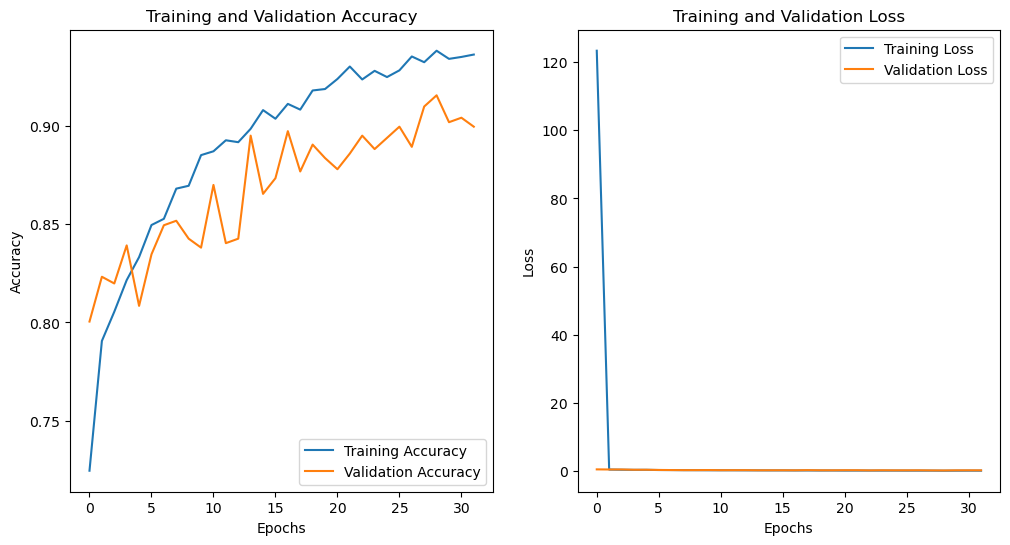

In [9]:
# Ploting training and validation info
plot_training_history(history)

In [8]:
# Saving the model
save_model(model, save_path)

2024-07-02 08:44:44.130116: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../models/assets
